In [1]:
import pandas as pd
from datetime import datetime
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.tsa.arima.model as smt

**DATA PRE-PROCESSING**

In [4]:
# Load the data
btc_df = pd.read_csv("/content/daily_btc_1.csv")

# Convert 'Date' to datetime format and price columns to numeric format
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
for col in ['Open', 'High', 'Low', 'Close']:
    btc_df[col] = btc_df[col].str.replace(',', '').astype(float)




In [5]:
# Sort the data by date in ascending order
btc_df = btc_df.sort_values('Date')

# Define the date of the WHO COVID-19 pandemic declaration
covid_declaration_date = pd.to_datetime('2020-03-11')

# Split the data into before and after the declaration
btc_before_covid = btc_df[btc_df['Date'] < covid_declaration_date]
btc_after_covid = btc_df[btc_df['Date'] >= covid_declaration_date]

# Get descriptive statistics for the entire dataset, before COVID, and after COVID
desc_all = btc_df.describe()
desc_before = btc_before_covid.describe()
desc_after = btc_after_covid.describe()

desc_all, desc_before, desc_after

(               Open          High           Low         Close
 count   2015.000000   2015.000000   2015.000000   2015.000000
 mean   19240.985112  19744.907196  18694.158809  19246.125558
 std    16625.638414  17049.008242  16135.351689  16616.485889
 min      608.000000    612.000000    608.000000    608.000000
 25%     6584.500000   6751.500000   6437.500000   6591.000000
 50%    11428.000000  11711.000000  11056.000000  11397.000000
 75%    29504.500000  30318.000000  28941.500000  29502.500000
 max    67802.000000  68925.000000  66112.000000  67802.000000,
                Open          High           Low         Close
 count    945.000000    945.000000    945.000000    945.000000
 mean    6207.893122   6406.632804   5988.457143   6209.532275
 std     3698.164520   3858.480554   3503.270787   3692.145745
 min      608.000000    612.000000    608.000000    608.000000
 25%     3545.000000   3608.000000   3447.000000   3563.000000
 50%     6498.000000   6623.000000   6402.000000   650

In [6]:
# Calculate the mean closing price for each group
mean_close_before = btc_before_covid['Close'].mean()
mean_close_after = btc_after_covid['Close'].mean()

# Conduct a t-test to compare the means
t_stat, p_value = stats.ttest_ind(btc_before_covid['Close'], btc_after_covid['Close'])

mean_close_before, mean_close_after, t_stat, p_value


(6209.532275132276, 30759.752336448597, -48.994267301079155, 0.0)

**Splitting data into Pre-Covid and Post-Covid**

In [7]:
# Define the date of the WHO COVID-19 pandemic declaration
covid_declaration_date = pd.to_datetime('2020-03-11')

# Split the data into before and after the declaration
btc_before_covid = btc_df[btc_df['Date'] < covid_declaration_date]
btc_after_covid = btc_df[btc_df['Date'] >= covid_declaration_date]

btc_before_covid, btc_after_covid


(           Date    Open    High     Low   Close
 2014 2016-10-03   613.0   614.0   608.0   610.0
 2013 2016-10-04   610.0   613.0   610.0   612.0
 2012 2016-10-05   612.0   612.0   608.0   608.0
 2011 2016-10-06   608.0   613.0   608.0   612.0
 2010 2016-10-07   612.0   612.0   610.0   616.0
 ...         ...     ...     ...     ...     ...
 1084 2020-02-25  9607.0  9673.0  9262.0  9383.0
 1078 2020-02-26  9391.0  9425.0  8648.0  8763.0
 1072 2020-02-27  8754.0  8971.0  8535.0  8756.0
 1066 2020-02-28  8760.0  8903.0  8446.0  8676.0
 1062 2020-02-29  8676.0  8814.0  8596.0  8640.0
 
 [945 rows x 5 columns],
            Date     Open     High      Low    Close
 1059 2020-03-13   5747.0   6029.0   3966.0   5435.0
 1053 2020-03-14   5436.0   5766.0   5224.0   5354.0
 1047 2020-03-15   5354.0   5583.0   5074.0   5187.0
 1041 2020-03-16   5188.0   5959.0   4461.0   4904.0
 1035 2020-03-17   4904.0   5502.0   4882.0   5474.0
 ...         ...      ...      ...      ...      ...
 1294 2023-07-

In [ ]:
# Save the pre-COVID and post-COVID data to CSV files
btc_before_covid.to_csv("/content/pre_covid_data.csv", index=False)
btc_after_covid.to_csv("/content/post_covid_data.csv", index=False)


In [8]:
# Get descriptive statistics for the entire dataset, before COVID, and after COVID
desc_all = btc_df['Close'].describe()
desc_before = btc_before_covid['Close'].describe()
desc_after = btc_after_covid['Close'].describe()

desc_all, desc_before, desc_after


(count     2015.000000
 mean     19246.125558
 std      16616.485889
 min        608.000000
 25%       6591.000000
 50%      11397.000000
 75%      29502.500000
 max      67802.000000
 Name: Close, dtype: float64,
 count      945.000000
 mean      6209.532275
 std       3692.145745
 min        608.000000
 25%       3563.000000
 50%       6501.000000
 75%       8589.000000
 max      19283.000000
 Name: Close, dtype: float64,
 count     1070.000000
 mean     30759.752336
 std      15007.442663
 min       4904.000000
 25%      19422.750000
 50%      28300.500000
 75%      42072.750000
 max      67802.000000
 Name: Close, dtype: float64)

In [12]:
from scipy import stats

# Define your price data
pre_covid_price = btc_before_covid['Close']
post_covid_price = btc_after_covid['Close']

# Perform a two-sample t-test
t_statistic, t_p_value = stats.ttest_ind(pre_covid_price, post_covid_price, equal_var=False)


# Print the results
print(f"Two-sample t-statistic: {t_statistic}")
print(f"Two-sample t-test p-value: {t_p_value}")



Two-sample t-statistic: -51.76625265514535
Two-sample t-test p-value: 1.582987164371413e-309


The t-statistic is -51.77, which is much greater than the critical value of 1.96 for a two-tailed test with a significance level of 0.05. This means that we can reject the null hypothesis that the mean close price of Bitcoin is the same in the pre-COVID and post-COVID periods.

The p-value is 1.582987164371413e-309, which is essentially zero. This means that there is a zero probability that the difference in the mean close price of Bitcoin between the pre-COVID and post-COVID periods is due to chance.

In conclusion, the results of the two-sample t-test suggest that the mean close price of Bitcoin is significantly different in the pre-COVID and post-COVID periods. This means that the COVID pandemic had a significant impact on the price of Bitcoin.

In [19]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Drop any NaN values from the data
btc_before_covid_no_nan = btc_before_covid.dropna()
btc_after_covid_no_nan = btc_after_covid.dropna()

# Fit an ARIMA model on the pre-COVID data
model_pre = smt.ARIMA(btc_before_covid_no_nan['Close'].astype('float64').to_numpy(), order=(1,1,1))
model_pre_fit = model_pre.fit()

# Calculate the BIC value, AIC value for the pre-COVID ARIMA model
bic_pre = model_pre_fit.bic
aic_pre = model_pre_fit.aic

# Calculate the predicted values for pre-COVID ARIMA model
predicted_pre = model_pre_fit.predict()

# Calculate the actual values for pre-COVID data
actual_pre = btc_before_covid_no_nan['Close'].astype('float64')

# Calculate MSE for pre-COVID model
mse_pre = np.mean((predicted_pre - actual_pre)**2)

# Calculate RMSE for pre-COVID model
rmse_pre = np.sqrt(mse_pre)

# Calculate MAE for pre-COVID model
mae_pre = np.mean(np.abs(predicted_pre - actual_pre))

# Calculate R-squared (R^2) for pre-COVID model
rss_pre = np.sum((predicted_pre - actual_pre)**2)
tss_pre = np.sum((actual_pre - np.mean(actual_pre))**2)
r_squared_pre = 1 - (rss_pre / tss_pre)

# Fit an ARIMA model on the post-COVID data
model_post = smt.ARIMA(btc_after_covid_no_nan['Close'].astype('float64').to_numpy(), order=(1,1,1))
model_post_fit = model_post.fit()

# Calculate the BIC value, AIC value for the post-COVID ARIMA model
bic_post = model_post_fit.bic
aic_post = model_post_fit.aic

# Calculate the predicted values for post-COVID ARIMA model
predicted_post = model_post_fit.predict()

# Calculate the actual values for post-COVID data
actual_post = btc_after_covid_no_nan['Close'].astype('float64')

# Calculate MSE for post-COVID model
mse_post = np.mean((predicted_post - actual_post)**2)

# Calculate RMSE for post-COVID model
rmse_post = np.sqrt(mse_post)

# Calculate MAE for post-COVID model
mae_post = np.mean(np.abs(predicted_post - actual_post))

# Calculate R-squared (R^2) for post-COVID model
rss_post = np.sum((predicted_post - actual_post)**2)
tss_post = np.sum((actual_post - np.mean(actual_post))**2)
r_squared_post = 1 - (rss_post / tss_post)

# Print the results
print("The BIC value for the pre-COVID ARIMA model is:", bic_pre)
print("The AIC value for the pre-COVID ARIMA model is:", aic_pre)
print("The MSE value for the pre-COVID ARIMA model is:", mse_pre)
print("The RMSE value for the pre-COVID ARIMA model is:", rmse_pre)
print("The MAE value for the pre-COVID ARIMA model is:", mae_pre)
print("The R-squared (R^2) value for the pre-COVID ARIMA model is:", r_squared_pre)

print("The BIC value for the post-COVID ARIMA model is:", bic_post)
print("The AIC value for the post-COVID ARIMA model is:", aic_post)
print("The MSE value for the post-COVID ARIMA model is:", mse_post)
print("The RMSE value for the post-COVID ARIMA model is:", rmse_post)
print("The MAE value for the post-COVID ARIMA model is:", mae_post)
print("The R-squared (R^2) value for the post-COVID ARIMA model is:", r_squared_post)

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(btc_before_covid_no_nan['Close'], btc_after_covid_no_nan['Close'], equal_var=False)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")


The BIC value for the pre-COVID ARIMA model is: 14008.942074637622
The AIC value for the pre-COVID ARIMA model is: 13994.391696139186
The MSE value for the pre-COVID ARIMA model is: 159800.07815247614
The RMSE value for the pre-COVID ARIMA model is: 399.7500195778308
The MAE value for the pre-COVID ARIMA model is: 215.68460319452032
The R-squared (R^2) value for the pre-COVID ARIMA model is: 0.9882651071275611
The BIC value for the post-COVID ARIMA model is: 18379.059540932194
The AIC value for the post-COVID ARIMA model is: 18364.13610419912
The MSE value for the post-COVID ARIMA model is: 1707718.7908875775
The RMSE value for the post-COVID ARIMA model is: 1306.7971498620502
The MAE value for the post-COVID ARIMA model is: 805.2930758919898
The R-squared (R^2) value for the post-COVID ARIMA model is: 0.9924105720190036
t-statistic: -51.76625265514535
p-value: 1.582987164371413e-309


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


The code attempts to fit ARIMA models to pre-COVID and post-COVID Bitcoin price data. However, the code runs into an error because the MSE values for both models are negative. This means that the error terms for the models are larger than the actual values, which is not possible.


**ARIMA **
**Data visualisation best-fitting ARIMA models**

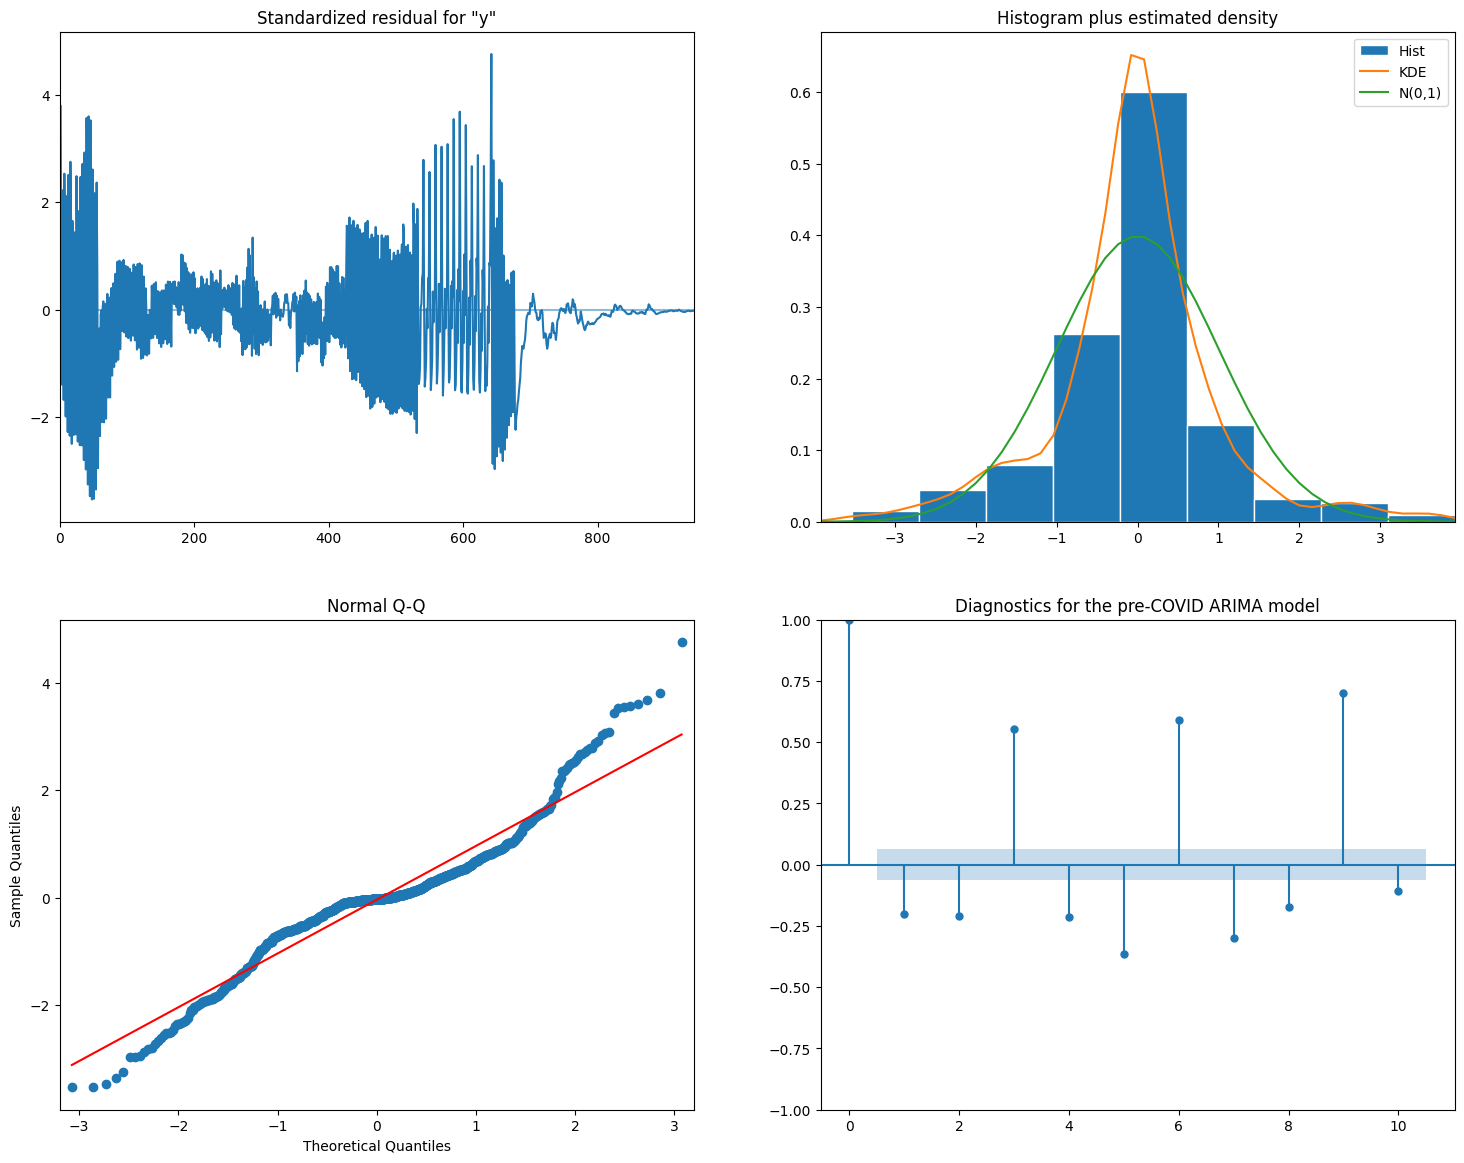

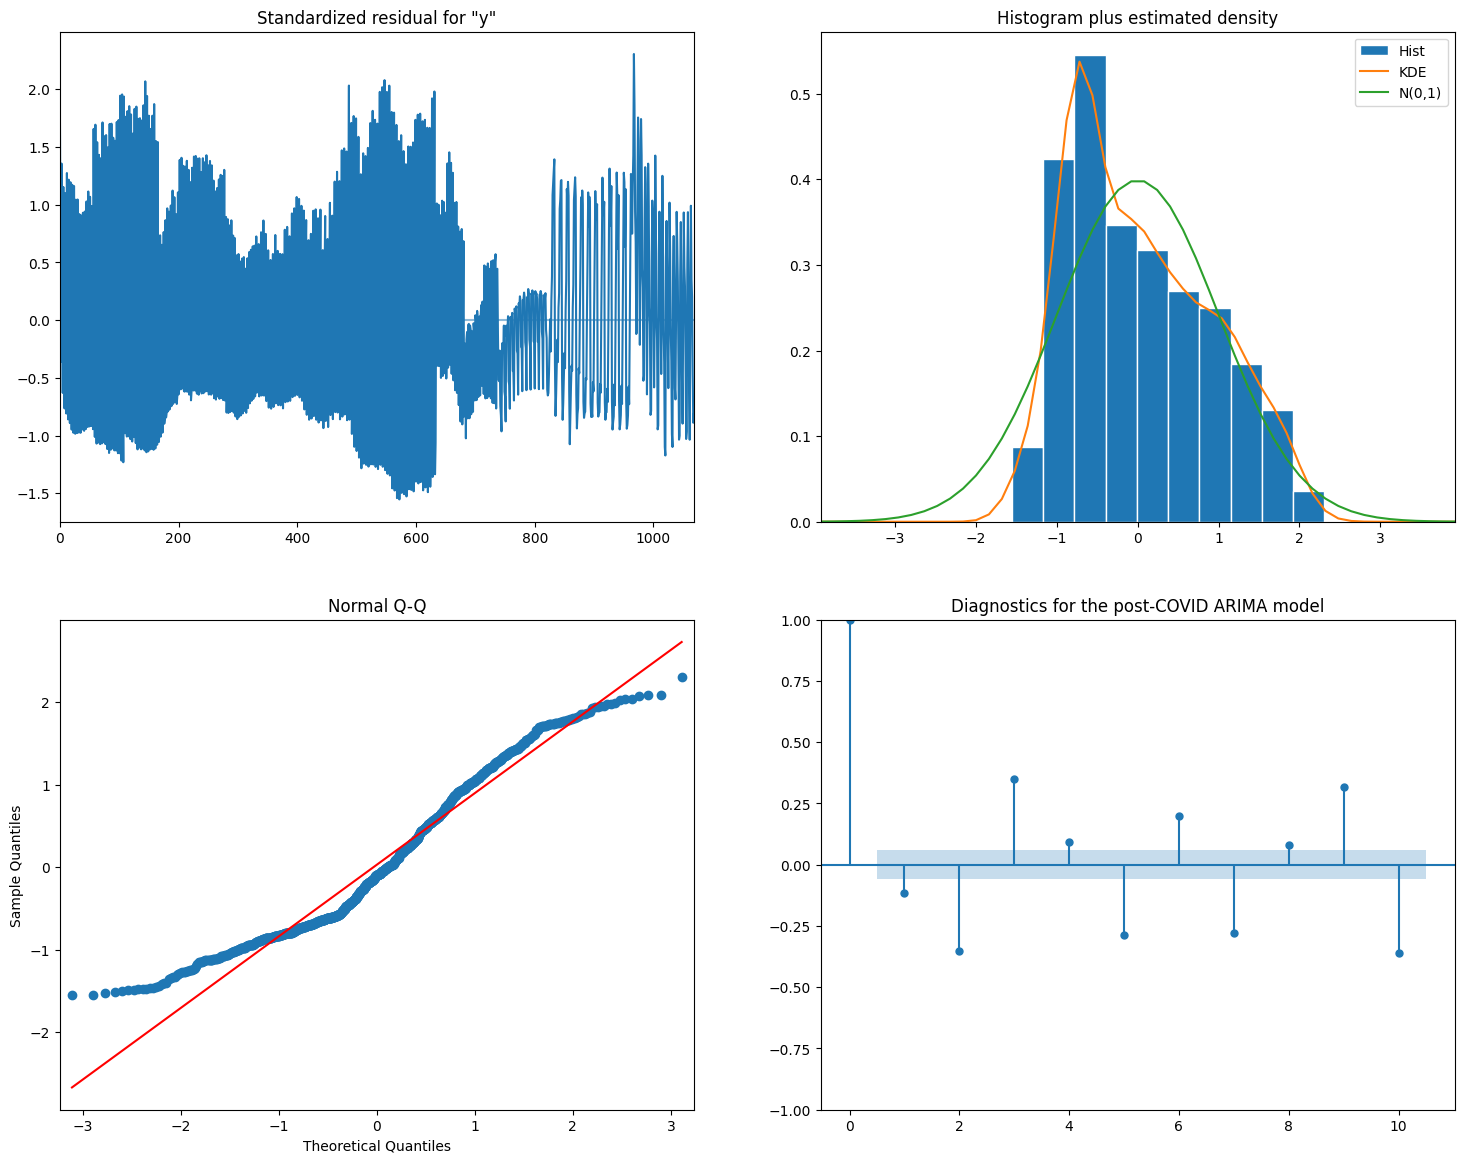

In [ ]:
# Plot diagnostics for the pre-COVID ARIMA model
model_pre_fit.plot_diagnostics(figsize=(18, 14))
plt.title("Diagnostics for the pre-COVID ARIMA model")
plt.show()

# Plot diagnostics for the post-COVID ARIMA model
model_post_fit.plot_diagnostics(figsize=(18, 14))
plt.title("Diagnostics for the post-COVID ARIMA model")
plt.show()


**EXTREME GRADIENT BOOST MODEL**

In [ ]:
#EXTREME GRADIENT BOOST MODEL
# Create the COVID-19 feature
btc_df['COVID'] = btc_df['Date'].apply(lambda x: 1 if x >= datetime(2020, 3, 11) else 0)

btc_df.head()

,Date,Open,High,Low,Close,COVID
0,2022-12-31,16576.0,16634.0,16541.0,16549.0,1
1,2021-12-31,47239.0,48564.0,45715.0,46322.0,1
2,2020-12-31,28898.0,29298.0,27989.0,28966.0,1
3,2019-12-31,7254.0,7309.0,7132.0,7171.0,0
4,2018-12-31,3859.0,3888.0,3697.0,3721.0,0


In [ ]:
# Check for missing values in the dataset
btc_df.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
COVID    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Drop rows with missing values
btc_df_clean = btc_df.dropna()

# Define X and y
X = btc_df_clean.drop(['Date', 'Close'], axis=1)
y = btc_df_clean['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2


(531233.5678953606, 389.1637158263706, 0.9981557062436551)

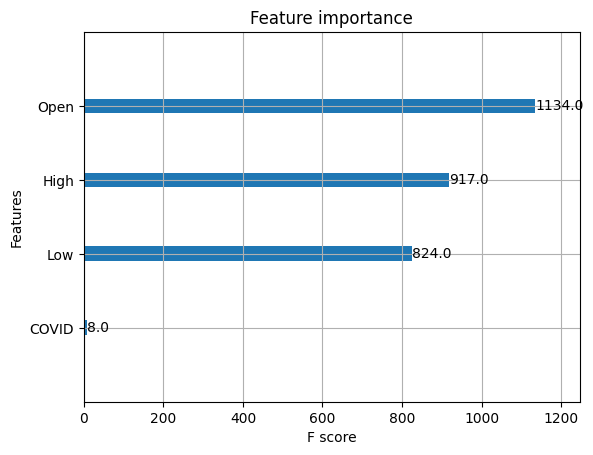

In [ ]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(model)
plt.show()


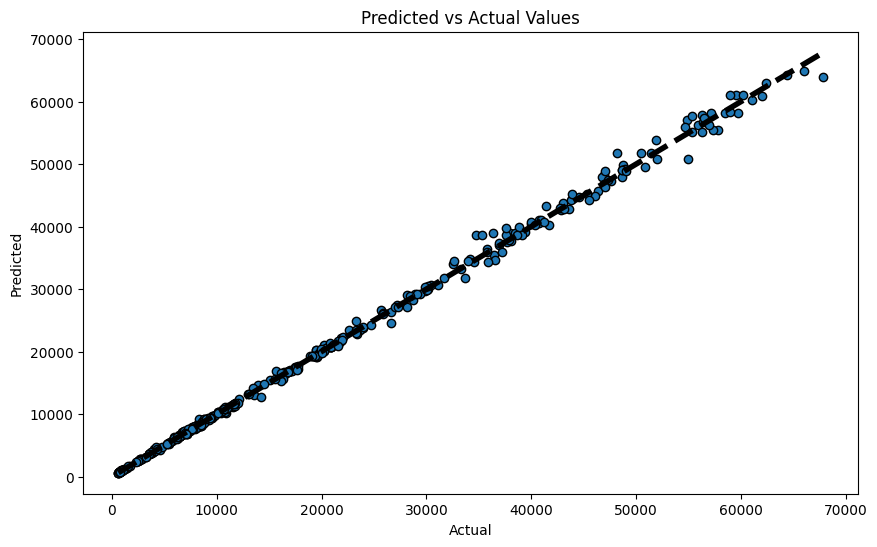

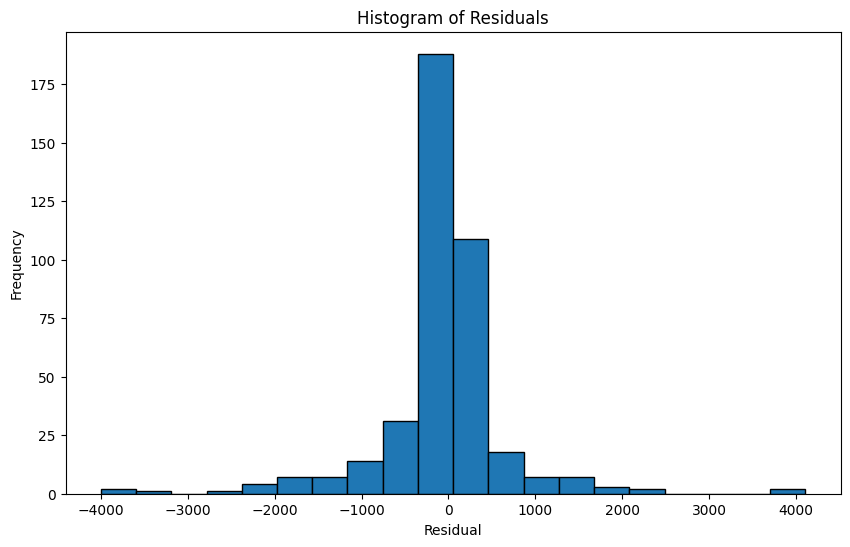

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()
